In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
movies_actor = pd.read_csv("data/actor_movie_combi.csv")
movies_actor

,tconst,ordering,nconst,gender,primaryName,birthYear,deathYear,startYear,genres,deatYear,age_at_movie_start,averageRating,numVotes,exp_so_far,drama_exp_so_far,action_exp_so_far,romance_exp_so_far,comedy_exp_so_far
0,tt7816420,1,nm1155956,0,Eadweard Muybridge,1830.0,1904,1881.0,"Documentary,Short",1904.0,51.0,5.2,462.0,0,0,0,0,0
1,tt1758563,1,nm1796515,0,Adolphe Le Prince,1872.0,1901,1888.0,"Documentary,Short",1901.0,16.0,5.5,1333.0,0,0,0,0,0
2,tt0361921,1,nm1362928,0,Giuseppe Sacco Albanese,1872.0,1943,1890.0,"Documentary,Short",1943.0,18.0,5.0,1508.0,0,0,0,0,0
3,tt0416047,1,nm1362928,0,Giuseppe Sacco Albanese,1872.0,1943,1890.0,Short,1943.0,18.0,4.2,425.0,1,0,0,0,0
4,tt0416046,1,nm1362928,0,Giuseppe Sacco Albanese,1872.0,1943,1890.0,Short,1943.0,18.0,4.8,1106.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698941,tt21093464,1,nm1048199,1,Jee-Young Kim,1938.0,2017,2022.0,Drama,2017.0,84.0,7.9,9.0,49,12,0,38,40
698942,tt21155694,7,nm4152681,0,Aleksey Gerilovich,1973.0,2022,2022.0,"Comedy,Drama",2022.0,49.0,7.2,51.0,1,1,0,0,2
698943,tt8442440,10,nm0878500,1,Mary Twala,1939.0,2020,2022.0,Drama,2020.0,83.0,6.2,23.0,6,6,0,0,0
698944,tt20599022,8,nm11512147,1,Kim Mi-Soo,1992.0,2022,2022.0,"Comedy,Fantasy,Romance",2022.0,30.0,8.6,20.0,11,2,0,11,12


A confounder to consider: audience preference 

The preferences of moviegoers can change over time. What may have been popular in one era may not be as popular in another. It’s important to consider how audience preferences may have changed over the different time periods we are analyzing. So let's see what we can find. We will divide our data into subgroups that depend on time periods (think baby boomer era vs gen Z era for example) to reduce the impact of the previously considered confounders; movies in the same time-period are much more likely to be made using similar technology and during comparable economic conditions. We can see how audience preference shifts through time (by seeing how the top movies genres vary through time for example)


    Greatest Generation (born circa 1901 to 1924)
    Silent Generation (circa 1925 to 1945)
    Baby Boomers (circa 1946 to 1964)
    Generation X (circa 1965 to 1985)
    Millennial Generation (circa 1985 to 1996)
    Gen Z (post-Millennial) (circa 1997 to 2012)



In [ ]:
greatest = movies_actor.loc[movies_actor["startYear"] <= 1924]

silent = movies_actor.loc[movies_actor["startYear"] >= 1925]
silent = silent.loc[silent["startYear"] <= 1945]

baby_boomers = movies_actor.loc[movies_actor["startYear"] >= 1945] 
baby_boomers = baby_boomers.loc[baby_boomers["startYear"] <= 1964]

boomers = movies_actor[movies_actor["startYear"] >= 1965]
boomers = boomers.loc[boomers["startYear"] <= 1985]

millennial = movies_actor[movies_actor["startYear"] >= 1986]
millennial = millennial.loc[millennial["startYear"] <= 1996]

gen_z = movies_actor[movies_actor["startYear"] >= 1997]
gen_z = gen_z[gen_z["startYear"] <= 2012]

gen_x = movies_actor[movies_actor["startYear"] >= 2013]

In [ ]:
all_data = [greatest, silent, baby_boomers, boomers, millennial, gen_z, gen_x]
labels = ["greatest_generation", "silent_generation", "baby_boomers", "boomers", "millennial", "gen_z", "gen_x"]

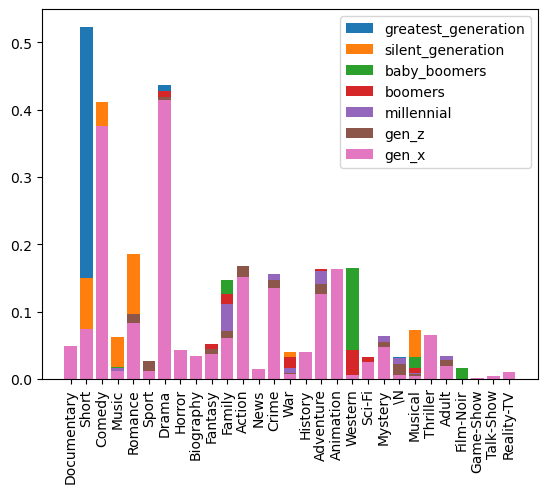

In [ ]:
# Now we define the code to apply to every generation
def construct_top_genres(data, labelIndex):
    g = data["genres"].apply(lambda x: x.split(","))
    g = [item for sublist in g for item in sublist]
    from collections import Counter
    counts = Counter(g)
    x, y = [], []
    totalMovies = data["tconst"].count().sum()
    for key, val in counts.items():
        x.append(key)
        y.append(val/totalMovies)
        
    plt.bar(x, y, label=labels[labelIndex])
    plt.xticks(rotation=90)
    plt.legend()

for i, dataset in enumerate(all_data):
    construct_top_genres(dataset, i)


Gen_X sees a boom in the multitude of genres per movie released. In earlier years, there was less genres per movie on average. Let's see if that's true

The average number of genres per movie for greatest_generation is 1.87
The variance of the number of genres per movie for greatest_generation is 0.45 

The average number of genres per movie for silent_generation is 1.98
The variance of the number of genres per movie for silent_generation is 0.70 

The average number of genres per movie for baby_boomers is 1.85
The variance of the number of genres per movie for baby_boomers is 0.70 

The average number of genres per movie for boomers is 1.94
The variance of the number of genres per movie for boomers is 0.73 

The average number of genres per movie for millennial is 1.99
The variance of the number of genres per movie for millennial is 0.74 

The average number of genres per movie for gen_z is 2.00
The variance of the number of genres per movie for gen_z is 0.75 

The average number of genres per movie for gen_x is 2.01
The variance of the number of genres per movie for gen_x is 0.73 



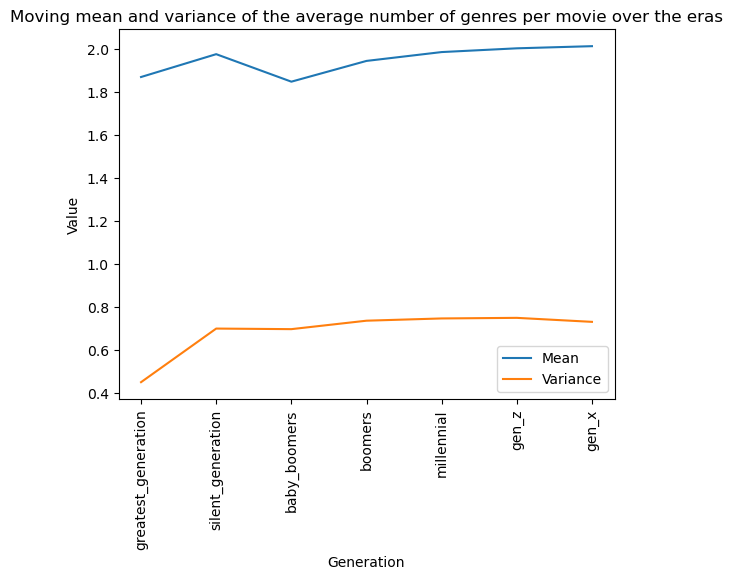

In [ ]:
def find_mean_and_variance(data, labelIndex):
    l = data["genres"].apply(lambda x: len(x.split(","))).sum()
    numMovies = data["tconst"].count()

    average = l / numMovies
    averages.append(average)
    variance = np.var(data["genres"].apply(lambda x: len(x.split(","))))
    variances.append(variance)
    print(f"The average number of genres per movie for {labels[i]} is {average:.2f}")
    print(f"The variance of the number of genres per movie for {labels[i]} is {variance:.2f} \n")

averages = []
variances = []
for i, dataset in enumerate(all_data):
    find_mean_and_variance(dataset, i)

plt.plot(labels, averages, label='Mean')
plt.plot(labels, variances, label='Variance')
plt.xlabel("Generation")
plt.ylabel("Value")
plt.title("Moving mean and variance of the average number of genres per movie over the eras")
plt.xticks(rotation=90)
plt.legend()

Let's look at the average actor experience of actors per era

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

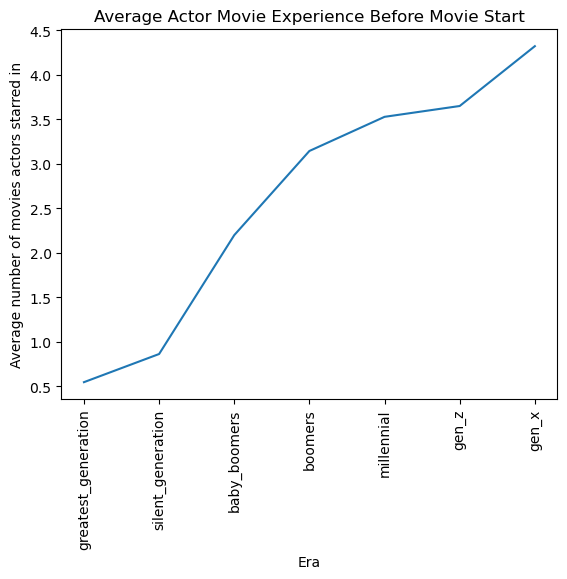

In [ ]:
def plot_experience(data, labelIndex, key="exp_so_far"):
    total_exp = data[key].sum()
    total = data.size
    val = total_exp / total
    if key == "exp_so_far":
        avg.append(val)
    if key == "drama_exp_so_far":
        drama_avg.append(val)
    if key == "romance_exp_so_far":
        romance_avg.append(val)
    if key == "action_exp_so_far":
        action_avg.append(val)
    if key == "comedy_exp_so_far":
        comedy_avg.append(val)

avg = []
drama_avg = []
romance_avg = []
comedy_avg = []
action_avg = []

for i, dataset in enumerate(all_data):
    plot_experience(dataset, i)
    plot_experience(dataset, i, "drama_exp_so_far")
    plot_experience(dataset, i, "action_exp_so_far")
    plot_experience(dataset, i, "comedy_exp_so_far")
    plot_experience(dataset, i, "romance_exp_so_far")

plt.plot(labels, avg) 
plt.title("Average Actor Movie Experience Before Movie Start")
plt.ylabel("Average number of movies actors starred in")
plt.xlabel("Era")
plt.xticks(rotation=90)

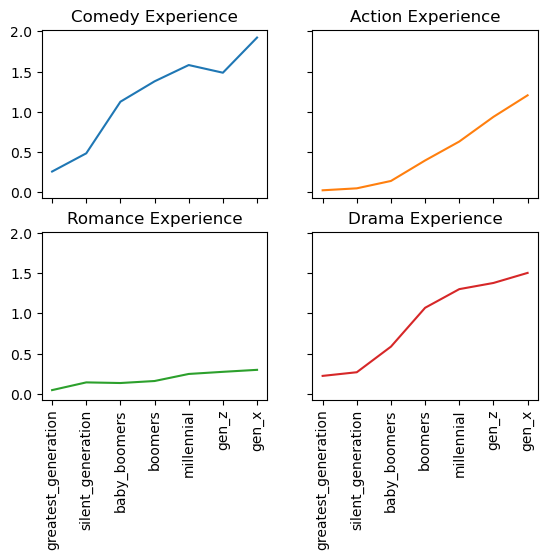

In [ ]:
# Now lets look at every genre per area
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True)

axs[0, 0].plot(labels, comedy_avg)
axs[0, 0].set_title('Comedy Experience')
axs[0, 1].plot(labels, action_avg, 'tab:orange')
axs[0, 1].set_title('Action Experience')
axs[1, 0].plot(labels, romance_avg, 'tab:green')
axs[1, 0].set_title('Romance Experience')
axs[1, 1].plot(labels, drama_avg, 'tab:red')
axs[1, 1].set_title('Drama Experience')

axs[0,0].tick_params(axis='x', rotation= 90)
axs[0,1].tick_params(axis='x', rotation= 90)
axs[1,0].tick_params(axis='x', rotation= 90)
axs[1,1].tick_params(axis='x', rotation= 90)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


Do more experienced actors/actresses tend to star in certain genres more frequently?

In [ ]:
maxes = movies_actor.sort_values("exp_so_far", ascending=False)
from collections import defaultdict
actor_to_total_exp = defaultdict(int)

for row in maxes.iterrows():
    actor = row[1]["nconst"]
    votes = row[1]["exp_so_far"]

    actor_to_total_exp[actor] = max(votes, actor_to_total_exp[actor])

In [ ]:
most_experienced_actors_first = sorted(actor_to_total_exp.items(), key=lambda x: x[1],reverse=True)

top_1000_experienced_actors = most_experienced_actors_first[:1000]

# Let's separate males and females and see the statistics for both -> get top 1k men and 1k women
# visualize their experience distribution (mean of every column?) -> stacked plot normalized for 

# x-axis: the main genres, within each one we should see all the distribution

# need to get top actors for every generation, not everything

In [ ]:
maxes = []
tops = []

greatest_maxes = greatest.sort_values("exp_so_far", ascending=False)
maxes.append(greatest_maxes)
greatest_top_1000 = defaultdict(int)
tops.append(greatest_top_1000)

silent_maxes = silent.sort_values("exp_so_far", ascending=False)
maxes.append(silent_maxes)
silent_top_1000 = defaultdict(int)
tops.append(silent_top_1000)

baby_maxes = baby_boomers.sort_values("exp_so_far", ascending=False)
maxes.append(baby_maxes)
baby_top_1000 = defaultdict(int)
tops.append(baby_top_1000)

boomers_maxes = boomers.sort_values("exp_so_far", ascending=False)
maxes.append(boomers_maxes)
boomers_top_1000 = defaultdict(int)
tops.append(boomers_top_1000)

millennial_maxes = millennial.sort_values("exp_so_far", ascending=False)
maxes.append(millennial_maxes)
millennial_top_1000 = defaultdict(int)
tops.append(millennial_top_1000)

gen_z_maxes = gen_z.sort_values("exp_so_far", ascending=False)
maxes.append(gen_z_maxes)
gen_z_top_1000 = defaultdict(int)
tops.append(gen_z_top_1000)

gen_x_maxes = gen_x.sort_values("exp_so_far", ascending=False)
maxes.append(gen_x_maxes)
gen_x_top_1000 = defaultdict(int)
tops.append(gen_x_top_1000)

def find_maxes(data, mapper):
    for row in data.iterrows():
        actor = row[1]["nconst"]
        exp = row[1]["exp_so_far"]
        
        if actor not in mapper:
            mapper[actor] = (0, 0, 0, 0, 0)
        
        if exp > mapper[actor][0]:
            mapper[actor] = (exp, row[1]["drama_exp_so_far"], row[1]["action_exp_so_far"], row[1]["comedy_exp_so_far"], row[1]["romance_exp_so_far"])
        # mapper[actor] = max(votes, mapper[actor])

for i in range(len(maxes)):
    # Find the max experienced actors for current generation
    find_maxes(maxes[i], tops[i])

    # Keep the top 1000
    tops[i] = sorted(tops[i].items(), key=lambda x: x[1],reverse=True)[:1000]

In [ ]:
# We can already find interesting things

print("The top 1000 actor in the earliest generation has", tops[0][-1][1][0], "movies under his belt.")
print("The top 1000 actor in the latest generation has", tops[-1][-1][1][0], "movies under his belt. \n")

print("The top actor in the earliest generation has", tops[0][0][1][0], "movies under his belt.")
print("The top actor in the latest generation has", tops[-1][0][1][0], "movies under his belt. \n")

print("--> big discrepancy!")


The top 1000 actor in the earliest generation has 5 movies under his belt.
The top 1000 actor in the latest generation has 18 movies under his belt. 

The top actor in the earliest generation has 180 movies under his belt.
The top actor in the latest generation has 1701 movies under his belt. 

--> big discrepancy!


We generalize the previous code and add onto it so that we can generate the per genre movie experience distribution of the top 1000 actors per generation in 3 different cases:
- Only look at male actors
- Only look at female actors
- Combine both

In [ ]:
def gender_based_analysis(gender_based = False, male = True):
    maxes = []
    tops = []

    if not gender_based:
        local_greatest = greatest
        local_silent = silent
        local_baby_boomers = baby_boomers
        local_boomers = boomers
        local_millennial = millennial
        local_gen_z = gen_z
        local_gen_x = gen_x
    elif gender_based and male:
        local_greatest = greatest.loc[greatest["gender"] == 0]
        local_silent = silent.loc[silent["gender"]== 0]
        local_baby_boomers = baby_boomers.loc[baby_boomers["gender"] == 0]
        local_boomers = boomers.loc[boomers["gender"] == 0]
        local_millennial = millennial.loc[millennial["gender"] == 0]
        local_gen_z = gen_z.loc[gen_z["gender"] == 0]
        local_gen_x = gen_x.loc[gen_x["gender"] == 0]
    elif gender_based and not male: # so female
        local_greatest = greatest.loc[greatest["gender"] == 1]
        local_silent = silent.loc[silent["gender"] == 1]
        local_baby_boomers = baby_boomers.loc[baby_boomers["gender"] == 1]
        local_boomers = boomers.loc[boomers["gender"] == 1]
        local_millennial = millennial.loc[millennial["gender"] == 1]
        local_gen_z = gen_z.loc[gen_z["gender"] == 1]
        local_gen_x = gen_x.loc[gen_x["gender"] == 1]

    greatest_maxes = local_greatest.sort_values("exp_so_far", ascending=False)
    maxes.append(greatest_maxes)
    greatest_top_1000 = defaultdict(int)
    tops.append(greatest_top_1000)

    silent_maxes = local_silent.sort_values("exp_so_far", ascending=False)
    maxes.append(silent_maxes)
    silent_top_1000 = defaultdict(int)
    tops.append(silent_top_1000)

    baby_maxes = local_baby_boomers.sort_values("exp_so_far", ascending=False)
    maxes.append(baby_maxes)
    baby_top_1000 = defaultdict(int)
    tops.append(baby_top_1000)

    boomers_maxes = local_boomers.sort_values("exp_so_far", ascending=False)
    maxes.append(boomers_maxes)
    boomers_top_1000 = defaultdict(int)
    tops.append(boomers_top_1000)

    millennial_maxes = local_millennial.sort_values("exp_so_far", ascending=False)
    maxes.append(millennial_maxes)
    millennial_top_1000 = defaultdict(int)
    tops.append(millennial_top_1000)

    gen_z_maxes = local_gen_z.sort_values("exp_so_far", ascending=False)
    maxes.append(gen_z_maxes)
    gen_z_top_1000 = defaultdict(int)
    tops.append(gen_z_top_1000)

    gen_x_maxes = local_gen_x.sort_values("exp_so_far", ascending=False)
    maxes.append(gen_x_maxes)
    gen_x_top_1000 = defaultdict(int)
    tops.append(gen_x_top_1000)

    def find_maxes(data, mapper):
        for row in data.iterrows():
            actor = row[1]["nconst"]
            exp = row[1]["exp_so_far"]
            
            if actor not in mapper:
                mapper[actor] = (0, 0, 0, 0, 0)
            
            if exp > mapper[actor][0]:
                mapper[actor] = (exp, row[1]["drama_exp_so_far"], row[1]["action_exp_so_far"], row[1]["comedy_exp_so_far"], row[1]["romance_exp_so_far"])
            # mapper[actor] = max(votes, mapper[actor])

    for i in range(len(maxes)):
        # Find the max experienced actors for current generation
        find_maxes(maxes[i], tops[i])

        # Keep the top 1000
        tops[i] = sorted(tops[i].items(), key=lambda x: x[1],reverse=True)[:1000]




    # We have the distribution of movie in all of them! 
    # Note that the order is (totalExperience, dramaExperience, actionExperience, comedyExperience, romanceExperience)

    # First step is to find the means of every genre for every era

    def find_mean(data, idx): #idx from 1 to 4 included
        return np.mean([x[1][idx] for x in data])

    means = [] # will have the same length as tops! 
    for top in tops:
        currMean = []
        for i in range(1, 5):
            currMean.append(find_mean(top, i))
        means.append(currMean)

    # means contains the average major movie genre experience for every generation
    # means[0] is the greatest_generation, means[-1] is gen_x
    # means[i] = (averageDrama, averageAction, averageComedy, averageRomance)


    # The x-locations for the genres
    x = np.arange(4)
    width = 0.12

    fig, ax = plt.subplots(1, figsize=(10, 10))

    greatest_means = means[0]
    rects1 = ax.bar(x - width * 2, greatest_means, width)

    silent_means = means[1]
    rects2 = ax.bar(x - width * 1, silent_means, width)

    baby_means = means[2]
    rects3 = ax.bar(x, baby_means, width)

    boomer_means = means[3]
    rects4 = ax.bar(x + width, boomer_means, width)

    millennial_means = means[4]
    rects5 = ax.bar(x + width * 2, millennial_means, width)

    gen_z_means = means[5]
    rects6 = ax.bar(x + width * 3, gen_z_means, width)

    gen_x_means = means[6]
    rects7 = ax.bar(x + width * 4, gen_x_means, width)

    if not gender_based:
        ax.set_title('Top 1000 actors genre experience distribution per generation')
    elif gender_based and male:
        ax.set_title('Top 1000 Male actors genre experience distribution per generation')
    elif gender_based and not male:
        ax.set_title('Top 1000 Female actors genre experience distribution per generation')
    ax.set_ylabel('Average acting experience in # of movies')
    ax.set_xticks(x+width)
    ax.set_xticklabels( ('Drama', 'Action', 'Comedy', 'Romance') )
    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0], rects7[0]), labels )

    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                    ha='center', va='bottom')

    plt.show()


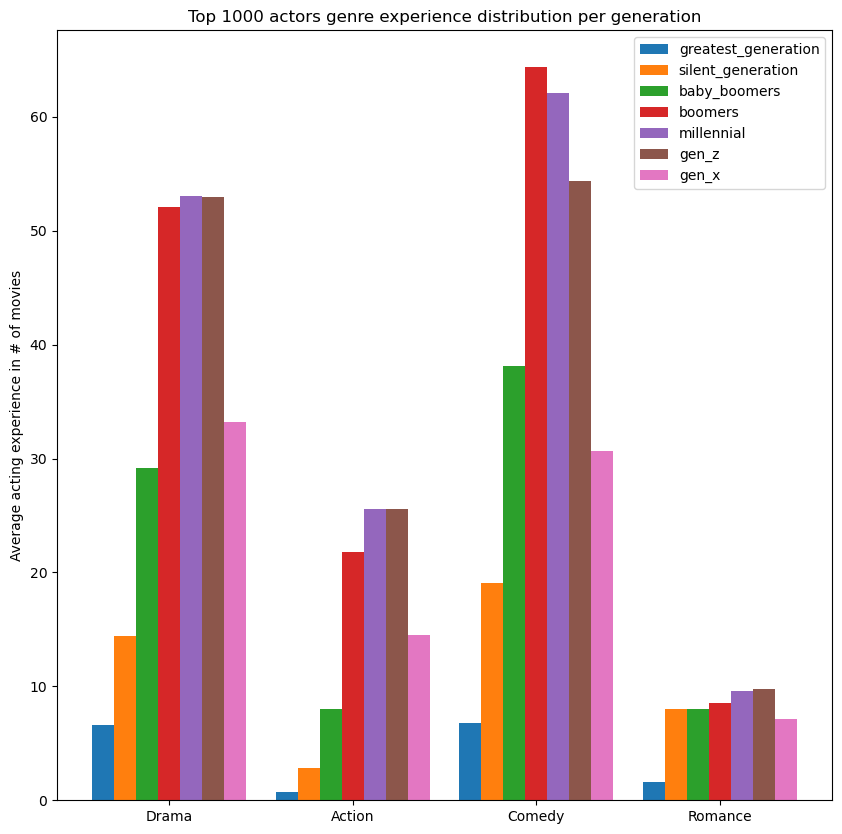

In [ ]:
# Look at both genders
gender_based_analysis(gender_based=False)

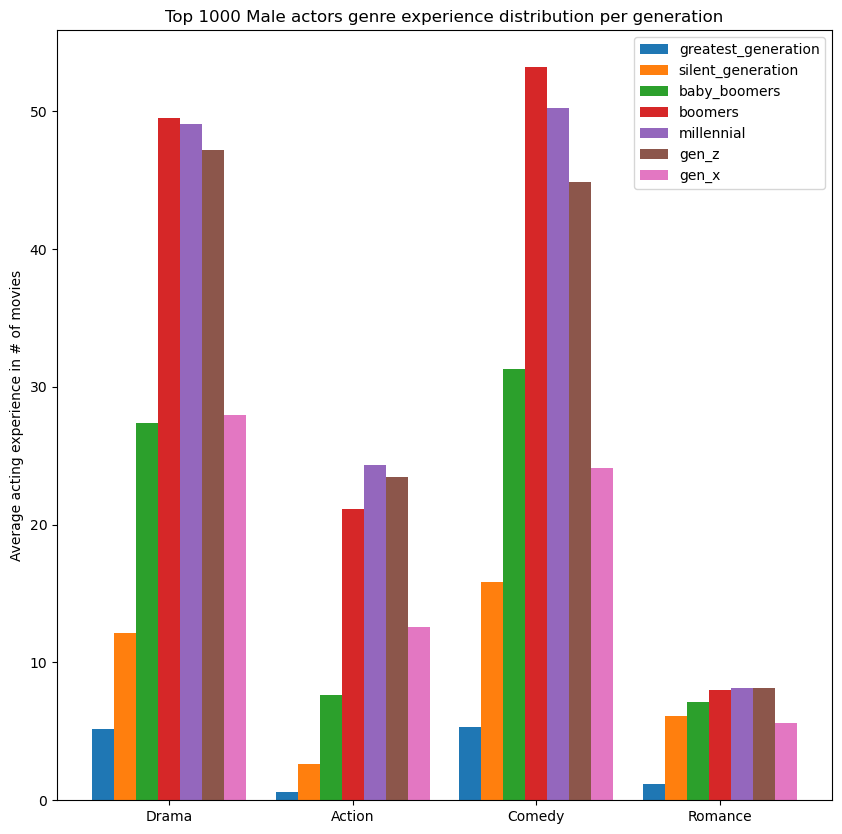

In [ ]:
# Look at male actors only
gender_based_analysis(gender_based = True, male=True)

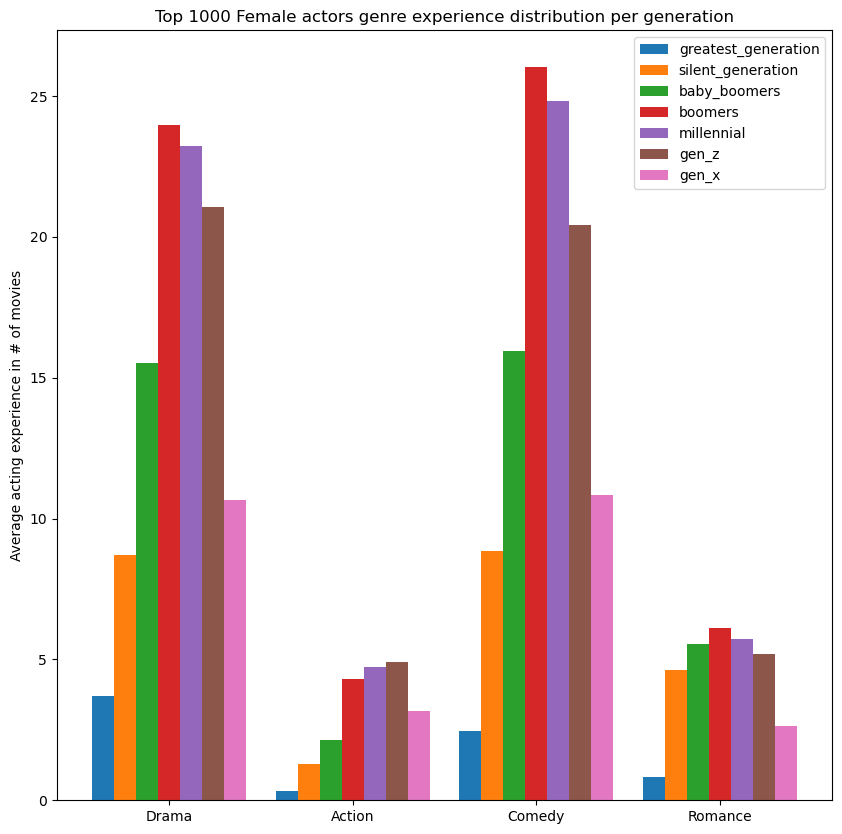

In [ ]:
# Look at female actors only
gender_based_analysis(gender_based= True, male=False)